In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno
import gc
from dython.nominal import associations
import seaborn as sns
from datetime import datetime

In [45]:
# load data
train_df = pd.read_csv('./datasets/train.csv')

# remove 'id' column from both training
train_df.drop('id',inplace=True,axis=1)


In [46]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
unique_values = {col: train_df[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")
    
gc.collect()

brand: 57 unique values
model: 1897 unique values
fuel_type: 7 unique values
engine: 1117 unique values
transmission: 52 unique values
ext_col: 319 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 1 unique values


55368

In [47]:
# matriz de correlacion incluyendo variables categoricas
def matriz_correlacion_categoricas(df):
    associations_df = associations(train_df, nominal_columns=categorical_columns.tolist(), plot = False)
    corr_matrix = associations_df['corr']
    plt.figure(figsize=(15, 10))
    plt.title('Correlation Matrix Including Categorical Variables', fontsize=16)
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
    plt.show()

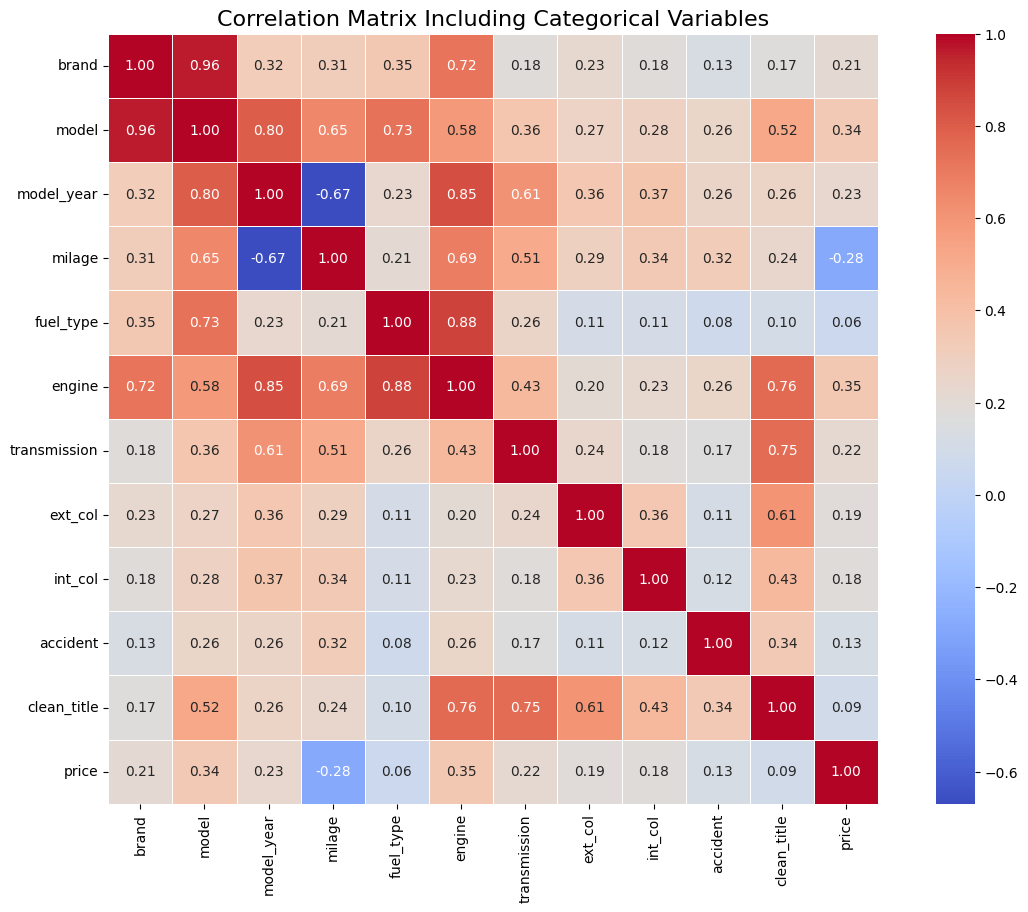

In [48]:
matriz_correlacion_categoricas(train_df)

In [ ]:
# Feature Engineering

def extract_horsepower(engine):
    ''' Extracts horsepower from engine string'''
    try:
        return float(engine.split('HP')[0])
    except:
        return None
    
def extract_engine_size(engine):
    ''' Extracts engine size from engine string'''
    try:
        return float(engine.split(' ')[1].replace('L', ''))
    except:
        return None
        
        
def feature_engineering(df_clean):
    
    current_year = datetime.now().year

    df_clean['age'] = current_year - df_clean['model_year']
    df_clean['milage_per_year'] = df_clean['milage']/df_clean['age']

    df_clean['horsepower'] = df_clean['engine'].apply(extract_horsepower)
    df_clean['engine_size'] = df_clean['engine'].apply(extract_engine_size)
    df_clean['power_to_weight_ratio'] = df_clean['horsepower']/df_clean['engine_size']

    luxury_brands =  ['Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Land', 
                    'Lexus', 'Jaguar', 'Bentley', 'Maserati', 'Lamborghini', 
                    'Rolls-Royce', 'Ferrari', 'McLaren', 'Aston', 'Maybach']
    df_clean['Is_Luxury_Brand'] = df_clean['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

    #df_clean['Accident_Impact'] = df_clean.apply(lambda x: 1 if x['accident'] == 1 and x['clean_title'] == 0 else 0, axis=1)
    
    return df_clean

In [52]:
# Apply feature engineering in the training set
feature_engineering(train_df)
train_df = train_df.dropna().reset_index(drop=True)
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age,milage_per_year,horsepower,engine_size,power_to_weight_ratio,Is_Luxury_Brand,Accident_Impact
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,18,11833.333333,172.0,1.6,107.500000,0,0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,23,6228.260870,252.0,3.9,64.615385,0,0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,23,5944.826087,320.0,5.3,60.377358,0,0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,8,2437.500000,420.0,5.0,84.000000,0,0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,4,1847.000000,208.0,2.0,104.000000,1,0


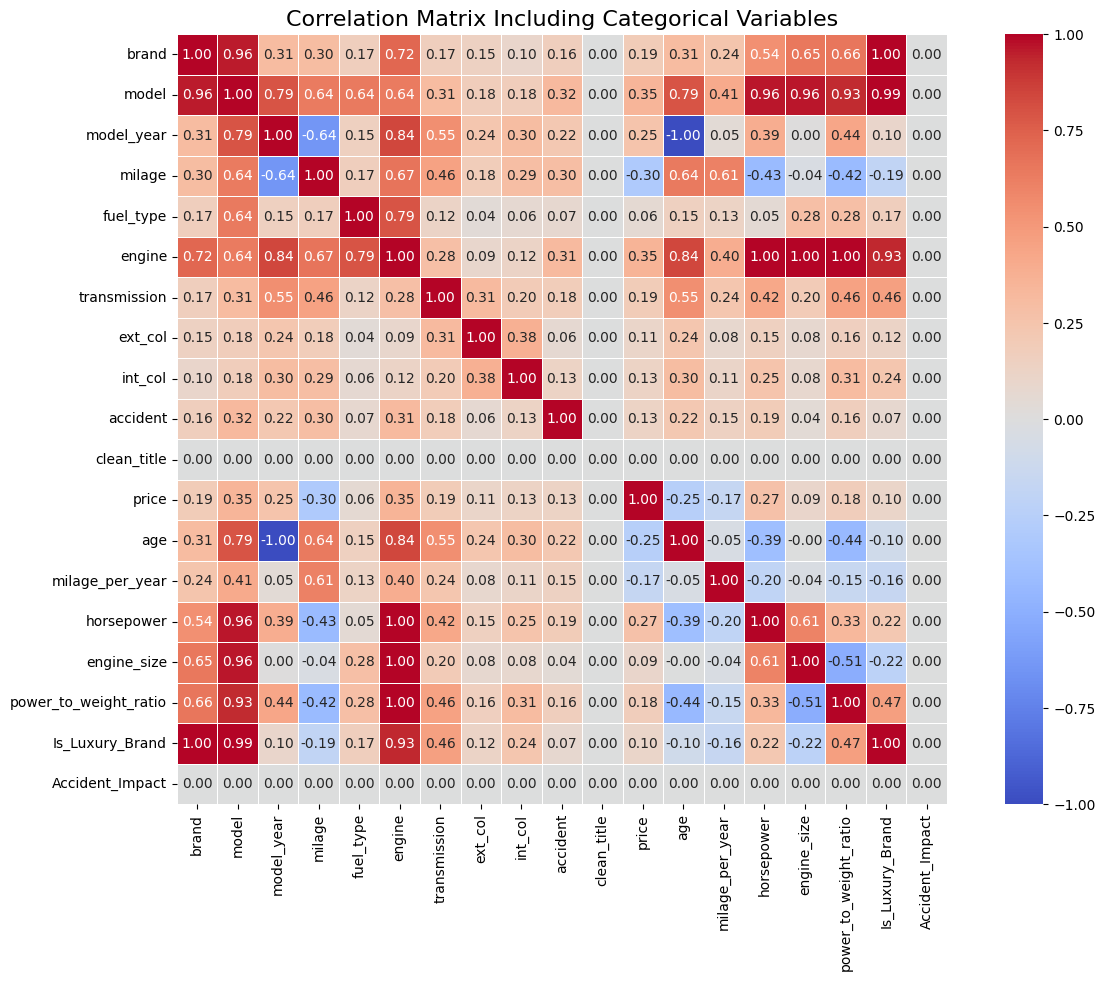

In [53]:
matriz_correlacion_categoricas(train_df)